# Russian Propaganda Tweets: Analysis.
As I am interested in propaganda tendencies I have chosen for my research a combined dataset of Russian propaganda tweets.

## Data exploration 
At first I imported python libraries needed for my research

In [7]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random
import glob 
from bs4 import BeautifulSoup
import string
import itertools
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

Next step is combining several files in one dataset

In [8]:
Propaganda = "C:/Users/xx/Desktop/RusProp"
print(os.listdir(Propaganda))

['Propaganda_tweets_1.csv', 'Propaganda_tweets_2.csv', 'Propaganda_tweets_3.csv', 'Propaganda_tweets_4.csv', 'Propaganda_tweets_5.csv', 'Propaganda_tweets_6.csv']


Creating filenames

In [9]:
filenames = glob.glob(os.path.join(Propaganda, "*.csv"))
print(filenames)

['C:/Users/xx/Desktop/RusProp\\Propaganda_tweets_1.csv', 'C:/Users/xx/Desktop/RusProp\\Propaganda_tweets_2.csv', 'C:/Users/xx/Desktop/RusProp\\Propaganda_tweets_3.csv', 'C:/Users/xx/Desktop/RusProp\\Propaganda_tweets_4.csv', 'C:/Users/xx/Desktop/RusProp\\Propaganda_tweets_5.csv', 'C:/Users/xx/Desktop/RusProp\\Propaganda_tweets_6.csv']


Combining csv files - showing the number of columns and rows

In [10]:
df_raw = pd.concat((pd.read_csv(f) for f in filenames))
print(df_raw.shape)
df_raw.head()

(2279483, 15)


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


Look at what is included in dataset

In [11]:
df_raw.describe(include="all")

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
count,2.279479e+06,2279483,2279482,2275077,2279483,2279483,2279483,2.279483e+06,2.279483e+06,2.279483e+06,1006898,2279120,2.279483e+06,2.279483e+06,2279483
unique,NaN,2022,1872093,36,56,776388,786267,NaN,NaN,NaN,2,20,NaN,NaN,8
top,NaN,EXQUOTE,В городе Сочи. Олимпиада – праздник или стихий...,United States,English,8/16/2017 1:29,3/22/2016 17:35,NaN,NaN,NaN,RETWEET,Right,NaN,NaN,RightTroll
freq,NaN,59652,480,1669818,1774291,188,1332,NaN,NaN,NaN,971959,599316,NaN,NaN,599784
mean,1.415631e+17,NaN,NaN,NaN,NaN,NaN,NaN,3.615567e+03,6.575874e+03,1.142994e+04,NaN,NaN,2.021059e-01,4.417221e-01,NaN
std,3.154440e+17,NaN,NaN,NaN,NaN,NaN,NaN,5.817502e+03,1.191239e+04,1.941612e+04,NaN,NaN,4.015709e-01,4.965922e-01,NaN
min,3.497640e+07,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,-1.000000e+00,-1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.877493e+09,NaN,NaN,NaN,NaN,NaN,NaN,3.730000e+02,3.520000e+02,1.792000e+03,NaN,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.587844e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.655000e+03,1.417000e+03,4.501000e+03,NaN,NaN,0.000000e+00,0.000000e+00,NaN
75%,3.255856e+09,NaN,NaN,NaN,NaN,NaN,NaN,4.911000e+03,1.125200e+04,1.370300e+04,NaN,NaN,0.000000e+00,1.000000e+00,NaN


Let us look at types of data included in each field

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279483 entries, 0 to 378294
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   external_author_id  float64
 1   author              object 
 2   content             object 
 3   region              object 
 4   language            object 
 5   publish_date        object 
 6   harvested_date      object 
 7   following           int64  
 8   followers           int64  
 9   updates             int64  
 10  post_type           object 
 11  account_type        object 
 12  new_june_2018       int64  
 13  retweet             int64  
 14  account_category    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 278.3+ MB


And distinguish missing values

In [13]:
df_raw.isna().sum().sort_values(ascending = False)

post_type             1272585
region                   4406
account_type              363
external_author_id          4
content                     1
author                      0
language                    0
publish_date                0
harvested_date              0
following                   0
followers                   0
updates                     0
new_june_2018               0
retweet                     0
account_category            0
dtype: int64

As I have distinguished only one content missing value I will remove it, as I am planning to wortk with content mainly. Still I have to take in account that I have a lot of missing values on account type, post type and region, which means I will replace them later with 'missing' to have more clear vision of research.

In [14]:
df_raw.dropna(subset = ['content'], inplace = True)
df_raw.isna().sum().sort_values(ascending = False)

post_type             1272584
region                   4406
account_type              363
external_author_id          4
author                      0
content                     0
language                    0
publish_date                0
harvested_date              0
following                   0
followers                   0
updates                     0
new_june_2018               0
retweet                     0
account_category            0
dtype: int64

In [15]:
updated_df = df_raw.fillna('missing')
updated_df

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,906000000000000000.0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,missing,Right,0,0,RightTroll
1,906000000000000000.0,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,missing,Right,0,0,RightTroll
2,906000000000000000.0,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,906000000000000000.0,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,missing,Right,0,0,RightTroll
4,906000000000000000.0,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378290,1513801268.0,YOUJUSTCTRLC,They'll say some shit anonymously like a cowar...,United States,English,1/7/2017 7:47,1/7/2017 7:48,2655,2724,3007,RETWEET,left,0,1,LeftTroll
378291,1513801268.0,YOUJUSTCTRLC,Mr. Brown knees https://t.co/LmAiHCnFlz,United States,English,1/7/2017 7:47,1/7/2017 7:48,2655,2724,3006,RETWEET,left,0,1,LeftTroll
378292,1513801268.0,YOUJUSTCTRLC,"Like, you want somebody who follows you regula...",United States,English,1/7/2017 7:47,1/7/2017 7:47,2655,2724,3005,RETWEET,left,0,1,LeftTroll
378293,1513801268.0,YOUJUSTCTRLC,"If you wanna ask me something, ask it here so ...",United States,English,1/7/2017 7:48,1/7/2017 7:48,2655,2724,3008,RETWEET,left,0,1,LeftTroll


Now we look at the numbers of all abovementioned categories (post type, account category and region), where values are not 'missing'

In [16]:
updated_df = updated_df.loc[updated_df.post_type != "missing" ]
updated_df.post_type.value_counts(normalize=True)

RETWEET        0.9653
QUOTE_TWEET    0.0347
Name: post_type, dtype: float64

In [17]:
updated_df = updated_df.loc[updated_df.account_category != "missing" ]
updated_df.account_category.value_counts(normalize=True)

NonEnglish      0.304447
LeftTroll       0.278717
RightTroll      0.257613
HashtagGamer    0.146895
Commercial      0.008153
Unknown         0.001905
Fearmonger      0.001298
NewsFeed        0.000972
Name: account_category, dtype: float64

In [18]:
updated_df = updated_df.loc[updated_df.region != "missing" ]
updated_df.region.value_counts(normalize=True)

United States                0.738692
Unknown                      0.127333
Azerbaijan                   0.053470
United Arab Emirates         0.041285
Russian Federation           0.011145
Italy                        0.010815
Belarus                      0.004492
Germany                      0.003314
Iraq                         0.002570
Ukraine                      0.002428
Israel                       0.001440
United Kingdom               0.001262
Afghanistan                  0.001030
Spain                        0.000269
France                       0.000186
Japan                        0.000059
Greece                       0.000054
Egypt                        0.000053
Canada                       0.000034
Samoa                        0.000030
India                        0.000020
Iran, Islamic Republic of    0.000007
Turkey                       0.000005
Saudi Arabia                 0.000005
Malaysia                     0.000003
Name: region, dtype: float64

Now I know that most of tweets is among  NonEnglish, LeftTroll, RightTroll account categories and the most popular regions are USA, Uknown, Azerbaidjan, UAE and Russia respectively. As I do not use region for my research - I keep the unknown values for now.

## Preliminary analysis

In this part I will look at the descriptive features of the data set context in terms of its meaning 

Now we look at number of unique authors of tweets

In [19]:
len(updated_df.author.unique())

1745

Defining authors who have more than 500 followers, but less than 1000

In [20]:

tweetmedia=updated_df
tweetmedia.loc[(tweetmedia['followers'] >= 500) & (tweetmedia['followers'] <= 1000), :].sort_values(
                        by='author', ascending=True).head(1000)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
6134,3312143142.0,4MYSQUAD,'@4mysquad especially if we can learn our own ...,United States,English,10/4/2015 13:44,10/4/2015 13:44,1072,874,3532,RETWEET,left,0,1,LeftTroll
9256,3312143142.0,4MYSQUAD,agreed on every point https://t.co/L5YPBxgtW2,United States,English,9/19/2015 0:50,9/19/2015 0:50,1450,609,2594,QUOTE_TWEET,left,0,1,LeftTroll
9255,3312143142.0,4MYSQUAD,"Youre doing a great job, guys, keep it up! ht...",United States,English,9/19/2015 0:45,9/19/2015 0:45,1450,609,2593,QUOTE_TWEET,left,0,1,LeftTroll
9254,3312143142.0,4MYSQUAD,NB lanes of 215 Freeway closed in Devore after...,United States,English,9/19/2015 0:43,9/19/2015 0:43,1450,609,2592,RETWEET,left,0,1,LeftTroll
9239,3312143142.0,4MYSQUAD,'@4mysquad @themartiney @F_M_D_B @Docmack6 @fo...,United States,English,9/18/2015 23:21,9/18/2015 23:21,1450,607,2587,RETWEET,left,0,1,LeftTroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,2404563335.0,5L5_5L5,В Крыму возобновляют работу промышленные предп...,United Arab Emirates,Russian,12/15/2015 6:58,12/15/2015 7:00,443,559,4241,RETWEET,Russian,1,1,NonEnglish
10871,2404563335.0,5L5_5L5,"Запрещенный Михалков, псевдоинцидент с Турцией...",United Arab Emirates,Russian,12/14/2015 21:36,12/14/2015 21:36,443,559,4240,RETWEET,Russian,1,1,NonEnglish
10870,2404563335.0,5L5_5L5,О методах работы современных украинских докуме...,United Arab Emirates,Russian,12/14/2015 15:35,12/14/2015 15:35,443,559,4239,RETWEET,Russian,1,1,NonEnglish
10986,2404563335.0,5L5_5L5,Карвахаль: приход Данило в «Реал» добавил мне ...,United Arab Emirates,Russian,7/25/2015 9:12,7/25/2015 9:12,1454,583,3425,RETWEET,Russian,1,1,NonEnglish


Defining  authors who have tweeted after 2016 in English

In [21]:
 
tweetmedia.loc[(tweetmedia['publish_date'] >= '2016') & (tweetmedia['language']=='English'), :].sort_values(
                       by='author',ascending=False)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
377133,2260577972.0,YAROSLAVVELIKY,🆘‼️🛩🔥USA: Dashcam footage shows the moment a p...,United States,English,5/4/2017 8:07,5/4/2017 8:07,83,4019,1708,RETWEET,Russian,0,1,NonEnglish
377070,2260577972.0,YAROSLAVVELIKY,WILL YOU HELP ME HELP THIS MAN? NO ONE ELSE IS...,United States,English,3/20/2017 0:37,3/20/2017 0:37,83,4112,1540,RETWEET,Russian,0,1,NonEnglish
377014,2260577972.0,YAROSLAVVELIKY,My nigga just counted down to get himself knoc...,United States,English,3/10/2017 23:16,3/10/2017 23:16,83,4126,1394,RETWEET,Russian,0,1,NonEnglish
377016,2260577972.0,YAROSLAVVELIKY,Selfie of the day from #Mosul. #Iraq https://t...,United States,English,3/11/2017 15:25,3/11/2017 15:26,83,4125,1412,RETWEET,Russian,0,1,NonEnglish
377017,2260577972.0,YAROSLAVVELIKY,The new fragrance that has taken the liberal w...,United States,English,3/11/2017 19:28,3/11/2017 19:28,83,4125,1416,RETWEET,Russian,0,1,NonEnglish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,906000000000000000.0,10_GOP,I’m back. https://t.co/vuqYQorM6U,Unknown,English,9/29/2017 1:14,9/29/2017 1:14,1051,9437,225,RETWEET,Right,0,1,RightTroll
325,906000000000000000.0,10_GOP,Welcome back @SteveScalise! #TeamScalise https...,Unknown,English,9/29/2017 1:14,9/29/2017 1:14,1051,9437,226,RETWEET,Right,0,1,RightTroll
326,906000000000000000.0,10_GOP,"I’ve seen presidents, foreign leaders, the pop...",Unknown,English,9/29/2017 1:41,9/29/2017 1:41,1050,9439,227,RETWEET,Right,0,1,RightTroll
327,906000000000000000.0,10_GOP,"So, which is it? https://t.co/WlNS8O5XcF",Unknown,English,9/29/2017 20:03,9/29/2017 20:03,1050,9576,233,RETWEET,Right,0,1,RightTroll


Defining  authors whose posts in Russian have been retweeted

In [22]:

tweetmedia.loc[(tweetmedia['language'] == 'Russian') & (tweetmedia['post_type']=='QUOTE_TWEET'), :].sort_values(
                       by='author',ascending=False)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
377267,2992047969.0,YATTVRUSSIA,! https://t.co/nVSwYspWFY,Unknown,Russian,6/1/2016 13:11,6/1/2016 13:12,396,151,171,QUOTE_TWEET,Russian,0,1,NonEnglish
376551,3007237911.0,YALANSKY_D,ну да конечно! https://t.co/Ame9Fz0e9D,Unknown,Russian,9/5/2017 9:54,9/5/2017 9:54,121,5,152,QUOTE_TWEET,Russian,0,1,NonEnglish
376521,3007237911.0,YALANSKY_D,Человек - духовная скрепа https://t.co/96zCHscbvP,Unknown,Russian,1/15/2017 17:12,1/15/2017 17:12,121,6,92,QUOTE_TWEET,Russian,0,1,NonEnglish
301553,731000000000000000.0,WHITEHOUSECARDS,«Против меня ведёт расследование в связи с уво...,United States,Russian,6/16/2017 15:37,6/16/2017 15:37,5342,10540,2878,QUOTE_TWEET,Russian,0,1,NonEnglish
300517,731000000000000000.0,WHITEHOUSECARDS,"WikiLeaks опубликовал очередную, 12-ю часть пе...",United States,Russian,10/19/2016 14:28,10/19/2016 14:28,4805,8010,858,QUOTE_TWEET,Russian,0,1,NonEnglish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144584,34976398.0,ANDREY_LISCHINA,wat? https://t.co/REaWJMgHZJ,Ukraine,Russian,11/15/2015 19:50,11/15/2015 19:51,74,29,163,QUOTE_TWEET,Russian,0,1,NonEnglish
144581,34976398.0,ANDREY_LISCHINA,so true... https://t.co/akwFREQzPM,Ukraine,Russian,10/21/2015 16:27,10/21/2015 16:27,67,27,160,QUOTE_TWEET,Russian,0,1,NonEnglish
44540,2186395434.0,AHMADYUSUFF03,New #KIA #Cadenza https://t.co/yeSFmlJkVu,Unknown,Russian,11/27/2015 9:24,11/27/2015 9:24,2596,615,5295,QUOTE_TWEET,Arabic,0,1,NonEnglish
44421,2186395434.0,AHMADYUSUFF03,#تويوتا تسحب 6.5 ملايين سيارة https://t.co/EDx...,Israel,Russian,10/22/2015 13:27,11/7/2015 10:34,2059,531,2851,QUOTE_TWEET,Arabic,0,1,NonEnglish


Defining  authors whose posts in Russian have been retweeted after 2016

In [23]:

tweetmedia.loc[(tweetmedia['language'] == 'Russian') & (tweetmedia['post_type']=='QUOTE_TWEET' ) 
               & (tweetmedia['publish_date'] >= '2016') ].sort_values(by='author', ascending=False)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
377267,2992047969.0,YATTVRUSSIA,! https://t.co/nVSwYspWFY,Unknown,Russian,6/1/2016 13:11,6/1/2016 13:12,396,151,171,QUOTE_TWEET,Russian,0,1,NonEnglish
376551,3007237911.0,YALANSKY_D,ну да конечно! https://t.co/Ame9Fz0e9D,Unknown,Russian,9/5/2017 9:54,9/5/2017 9:54,121,5,152,QUOTE_TWEET,Russian,0,1,NonEnglish
301958,731000000000000000.0,WHITEHOUSECARDS,Новый предвыборный ролик Трампа. ЕЩЕ БОЛЬШЕ ПА...,United States,Russian,8/22/2016 13:03,8/22/2016 13:03,3368,9813,530,QUOTE_TWEET,Russian,0,1,NonEnglish
301754,731000000000000000.0,WHITEHOUSECARDS,Дональд Трамп активно высказывает свои претенз...,United States,Russian,7/2/2017 14:45,7/2/2017 14:45,5337,10596,2977,QUOTE_TWEET,Russian,0,1,NonEnglish
301693,731000000000000000.0,WHITEHOUSECARDS,"""Тот факт, что президент Путин и я обсуждали р...",United States,Russian,7/10/2017 13:53,7/10/2017 13:54,5273,10644,3037,QUOTE_TWEET,Russian,0,1,NonEnglish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199567,87588938.0,ANZGRI,Ватник! https://t.co/r66ykKTABZ,United States,Russian,7/9/2017 12:44,7/9/2017 12:44,32,1259,68590,QUOTE_TWEET,Russian,0,1,NonEnglish
199614,87588938.0,ANZGRI,а надо было - Кашин https://t.co/1RTNH5sx7F,United States,Russian,8/18/2017 10:42,8/18/2017 10:52,32,1264,69376,QUOTE_TWEET,Russian,0,1,NonEnglish
198697,87588938.0,ANZGRI,RT_Avito https://t.co/jx7FTY5M8U,United States,Russian,3/14/2017 9:14,3/14/2017 9:14,32,1259,66033,QUOTE_TWEET,Russian,0,1,NonEnglish
144609,34976398.0,ANDREY_LISCHINA,so true https://t.co/lefupH3Xu3,Ukraine,Russian,9/26/2015 16:37,9/26/2015 16:37,62,26,157,QUOTE_TWEET,Russian,0,1,NonEnglish


Defining the 5000 most followed tweets by 4MYSQUAD - showed 4839 tweets (all matching by author)

In [24]:
MYSQUAD_most_followed = tweetmedia.loc[tweetmedia['author'] == '4MYSQUAD', :].nlargest(5000, 'followers')
MYSQUAD_most_followed

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
7296,4036537452.0,4MYSQUAD,"#YouGoodMan?⚡️ ""Black Men Are Giving Themselve...",United States,English,12/7/2016 13:26,12/7/2016 13:26,3994,4811,1621,RETWEET,left,0,1,LeftTroll
7299,4036537452.0,4MYSQUAD,Chris Rock announces his world standup tour in...,United States,English,12/7/2016 13:32,12/7/2016 13:32,3994,4811,1626,RETWEET,left,0,1,LeftTroll
7295,4036537452.0,4MYSQUAD,Listen to Black women.,United States,English,12/7/2016 13:26,12/7/2016 13:26,3994,4811,1620,RETWEET,left,0,1,LeftTroll
7297,4036537452.0,4MYSQUAD,"""They gon' think I won a Grammy, they gon' thi...",United States,English,12/7/2016 13:28,12/7/2016 13:28,3994,4811,1623,RETWEET,left,0,1,LeftTroll
7323,4036537452.0,4MYSQUAD,"The giraffe, the tallest land animal, is now a...",United States,English,12/8/2016 14:17,12/8/2016 14:17,3993,4808,1629,RETWEET,left,0,1,LeftTroll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,3312143142.0,4MYSQUAD,Dear @elonmusk please allow @MStewartIsaacs to...,United States,English,8/16/2015 16:49,8/16/2015 16:49,592,83,69,RETWEET,left,0,1,LeftTroll
7759,3312143142.0,4MYSQUAD,"oh, Jesus... Didn't hear about this https://t....",United States,English,8/15/2015 17:14,8/15/2015 17:14,567,52,53,QUOTE_TWEET,left,0,1,LeftTroll
7749,3312143142.0,4MYSQUAD,"""Justice is a living #MikeBrown. Justice is a ...",United States,English,8/12/2015 9:36,8/12/2015 9:36,562,32,24,RETWEET,left,0,1,LeftTroll
7719,3312143142.0,4MYSQUAD,this is wrong https://t.co/dITWa1j4LU,United States,English,8/11/2015 14:05,8/11/2015 14:05,543,6,13,QUOTE_TWEET,left,0,1,LeftTroll


Defining the number of updates of tweets made by authors

In [25]:
df_author_by_updates = tweetmedia.groupby('author')['updates'].sum()
df_author_by_updates

author
10_GOP            21822
1D_NICOLE_          789
1ERIK_LEE           666
1LORENAFAVA1    5654598
4EVER1937        725552
                 ...   
YA_YARIK_         20477
YKUDAJ681       1229383
YLLIA0            32711
YOLOBUHURTO         441
YOUJUSTCTRLC     985757
Name: updates, Length: 1745, dtype: int64

Visualizing top 10 updated authors

<AxesSubplot:xlabel='author'>

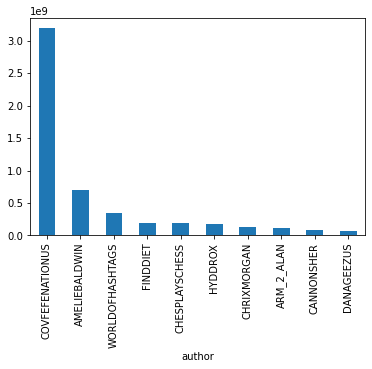

In [26]:
df_author_by_updates.sort_values(ascending=False)[:10]
top10_authors_update = df_author_by_updates.sort_values(ascending=False)[:10]
top10_authors_update.plot(kind='bar')

Visualizing and defining top 10 authors by number of persons he/she is following

<AxesSubplot:xlabel='author'>

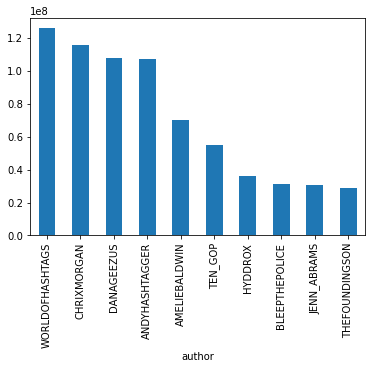

In [27]:
df_author_by_following = tweetmedia.groupby('author')['following'].sum()
top10_authors_following = df_author_by_following.sort_values(ascending=False)[:10]
top10_authors_following.plot(kind='bar')

Defining authors with more than 1000 followers

In [28]:
df_authors_by_followers = tweetmedia.drop(tweetmedia[tweetmedia['followers'] > 1000].index)
df_authors_by_followers

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
346,906000000000000000.0,10_GOP,Time to follow our fellow Trump supporter @10_...,Unknown,English,9/7/2017 23:16,9/7/2017 23:17,394,35,5,RETWEET,Right,0,1,RightTroll
347,906000000000000000.0,10_GOP,Hurricane Irma is raging but we have great tea...,Unknown,English,9/7/2017 23:59,9/7/2017 23:59,426,71,6,RETWEET,Right,0,1,RightTroll
469,1860330774.0,1ERIK_LEE,Why is someone even against the #petition? I'l...,United States,English,9/23/2015 9:02,9/23/2015 9:02,239,74,330,RETWEET,Right,0,1,RightTroll
470,1860330774.0,1ERIK_LEE,It’s reasonable to ban firearms sales in #blac...,United States,English,9/23/2015 9:03,9/23/2015 9:03,239,74,336,RETWEET,Right,0,1,RightTroll
471,839000000000000000.0,1LORENAFAVA1,"Masterchef, il vincitore è Valerio Braschi #Ma...",Italy,Italian,3/10/2017 0:00,3/10/2017 0:00,416,58,203,RETWEET,Italian,0,1,NonEnglish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377974,927360000000000000.0,YOLOBUHURTO,#Plasticbag ban in Kenya means mangoes are sol...,Unknown,English,12/9/2017 3:16,12/9/2017 3:16,151,14,32,RETWEET,?,1,1,Unknown
377975,927360000000000000.0,YOLOBUHURTO,José Pedro Crisólogo Mármol o simplemente cono...,Unknown,Spanish,12/9/2017 3:17,12/9/2017 3:18,152,14,33,RETWEET,?,1,1,Unknown
377976,927360000000000000.0,YOLOBUHURTO,have a nice night sweetheart @Harry_Styles,Unknown,English,12/9/2017 3:37,12/9/2017 3:37,171,15,36,RETWEET,?,1,1,Unknown
377977,927360000000000000.0,YOLOBUHURTO,'@niJoaANnFiXgMxK nma gap?',Unknown,English,12/9/2017 3:51,12/9/2017 3:51,188,16,39,RETWEET,?,1,1,Unknown


I will now define the language composition of the tweets 

In [29]:
tweetmedia.language.value_counts(normalize=False)

English                705187
Russian                241137
Ukrainian               16247
Italian                 13598
German                   6794
Bulgarian                3842
Uzbek                    3619
Serbian                  3573
Macedonian               2152
French                   1728
Spanish                  1539
Arabic                   1064
Norwegian                 682
Romanian                  571
Farsi (Persian)           569
Vietnamese                515
Dutch                     510
Japanese                  297
Estonian                  280
Croatian                  266
Albanian                  259
Catalan                   249
Swedish                   212
Portuguese                197
Finnish                   163
Icelandic                 146
Lithuanian                146
Turkish                   135
Polish                    133
Pushto                    119
Tagalog (Filipino)        108
Somali                     93
Latvian                    87
Kurdish   

And visualize the language composition

<AxesSubplot:title={'center':'Language distribution among tweets'}>

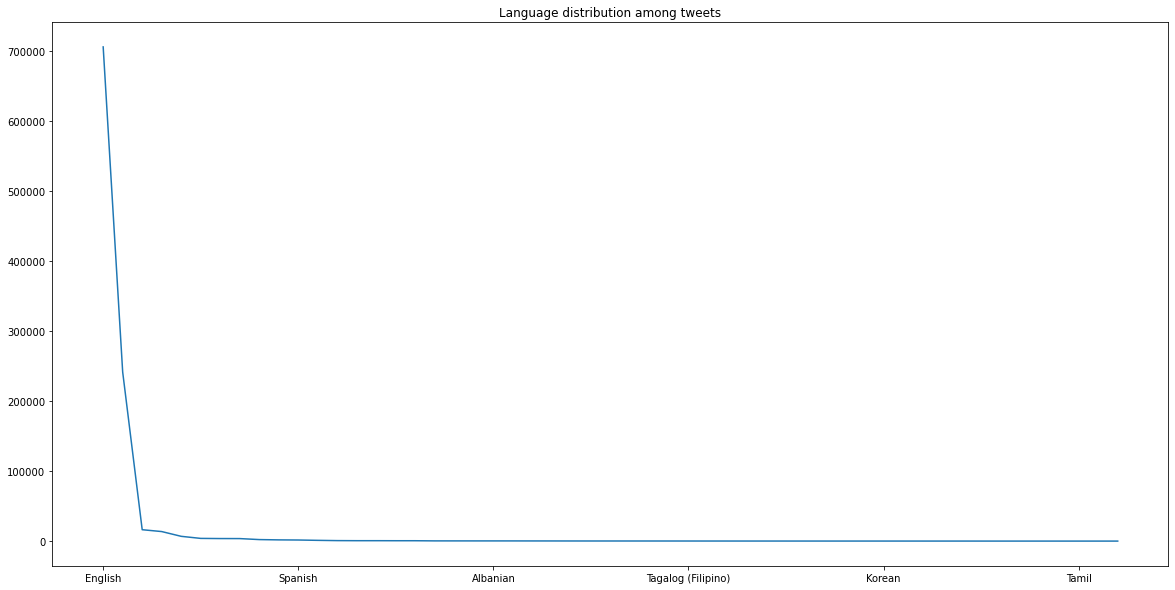

In [30]:
tweetmedia['language'].value_counts().plot(figsize=(20, 10), title= 'Language distribution among tweets')

As we can see, English predictably predominates over the other languages is represented by 70 per cent of all tweets. Further on, we distinguish the number of English and Russian tweets respectively.

In [31]:
df_english = tweetmedia.loc[tweetmedia.language=="English"]
df_russian = tweetmedia.loc[tweetmedia.language=="Russian"]
print(df_english.shape[0])
print(df_russian.shape[0])

705187
241137


Now I can switch to more detailed analysis. At first I look at the author of tweets in Russian with the most number of followers and retweets

Setting the language of tweets as Russian

In [32]:
russian_tweets = tweetmedia[tweetmedia['language'] == 'Russian']

Selecting the columns to examine, dropping duplicates and NA

In [33]:
tweets = russian_tweets[['author', 'content', 'account_category','post_type','publish_date','following','followers']]
tweets = tweets.drop_duplicates()
tweets = tweets.dropna()

We look at the distribution of troll categories

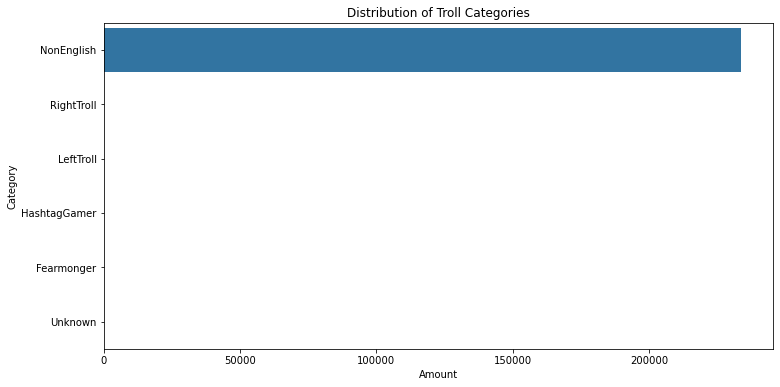

In [34]:
tweets['account_category'].value_counts()
bars = tweets['account_category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=bars.values, y=bars.index)
plt.title('Distribution of Troll Categories')
plt.xlabel('Amount')
plt.ylabel('Category');

As predicted NonEnglish is dominating. Now we look at distribution of Tweet Length.

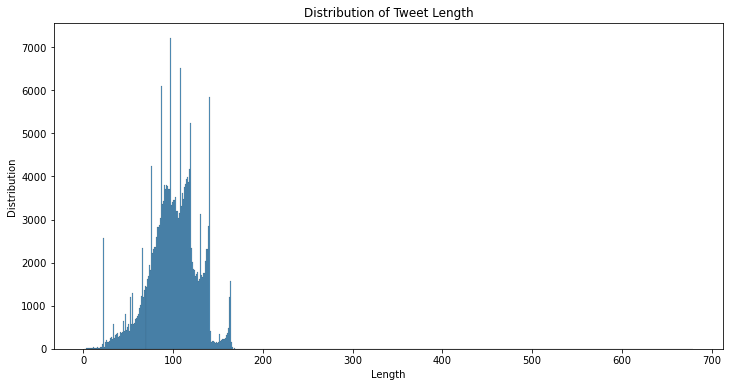

In [35]:
tweet_len = tweets['content'].str.len()

plt.figure(figsize=(12, 6))
sns.histplot(tweet_len, label='Tweet')

plt.title('Distribution of Tweet Length')
plt.xlabel('Length')
plt.ylabel('Distribution');

As we see the most russian language tweets lie in between 0 and 200 signs with a peak at app 100. Therefore we go for giving a new condition using mask() function to iterate through tweets less than 200.

Text(0, 0.5, 'Distribution')

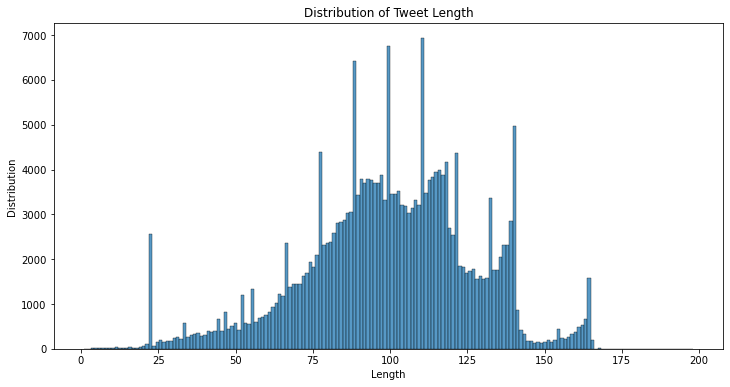

In [36]:
tweet_len = tweets['content'].str.len()

mask = tweet_len < 200
tweet_len = tweet_len[mask]

plt.figure(figsize=(12, 6))
sns.histplot(tweet_len, label='Tweet')

plt.title('Distribution of Tweet Length')
plt.xlabel('Length')
plt.ylabel('Distribution')

Now we look at the tweets which are longer than 200

In [37]:
tweets[tweets['content'].str.len() > 200]

,author,content,account_category,post_type,publish_date,following,followers
191934,ANTONHAYHAY,'@ReTWEET24FOLLOW @GOD7x24 @TwiterHero @nine_o...,LeftTroll,RETWEET,4/15/2017 23:29,303,748
248615,BABCHENKOVA,Вот так нам рады в Калуге или что говорят «ГАС...,NonEnglish,RETWEET,12/10/2017 14:14,861,1855
248640,BABCHENKOVA,ЦИК тут подсчитал фейковые подписи избирателей...,NonEnglish,RETWEET,2/7/2018 6:52,858,1852
248748,BABCHENKOVA,На 15:00 на выборах в Совет депутатов мун обра...,NonEnglish,RETWEET,5/27/2018 12:54,847,1812
259498,COMRADZAMPOLIT,"Товарищи, скоро день столетия годовщины Велико...",NonEnglish,RETWEET,10/1/2017 8:04,1591,40985
266094,COMRADZAMPOLIT,'@MID_RF @pravoslavie_rf @MID_RnD @ComradZampo...,NonEnglish,RETWEET,7/28/2017 8:35,1273,40006
127285,ROGOVILIA,'@AlexMolyonov @CCCP_SVA @Enchanteressse @EvSh...,NonEnglish,RETWEET,4/23/2017 12:34,53,1933
127291,ROGOVILIA,.@Flat_Green @LivingRealiti77 @AZZurabAZ @Lana...,NonEnglish,RETWEET,4/23/2017 20:43,53,1932
127292,ROGOVILIA,.@Flat_Green @LivingRealiti77 @AZZurabAZ @Lana...,NonEnglish,RETWEET,4/23/2017 20:43,53,1932
127384,ROGOVILIA,'@K2644 @5007003 @Alex_zhzhet @mocking_bird12 ...,NonEnglish,RETWEET,4/30/2017 10:28,53,1928


And define the whole text from the tweet by BABCHENKOVA

In [38]:
tweets.loc[248615,'content']

'Вот так нам рады в Калуге или что говорят «ГАС Выборы»😂  «Появились какие-то средства массовой информации, которые пытаются найти нарушения...»  (на самом деле разговор председателя ТИК, невольными свидетелями которого мы стали🙈)  #Калуга #выборы #Жуков https://t.co/Rt0L72qPIx'

Looking at the date distribution among tweets

<AxesSubplot:title={'center':'date distribution among tweets'}>

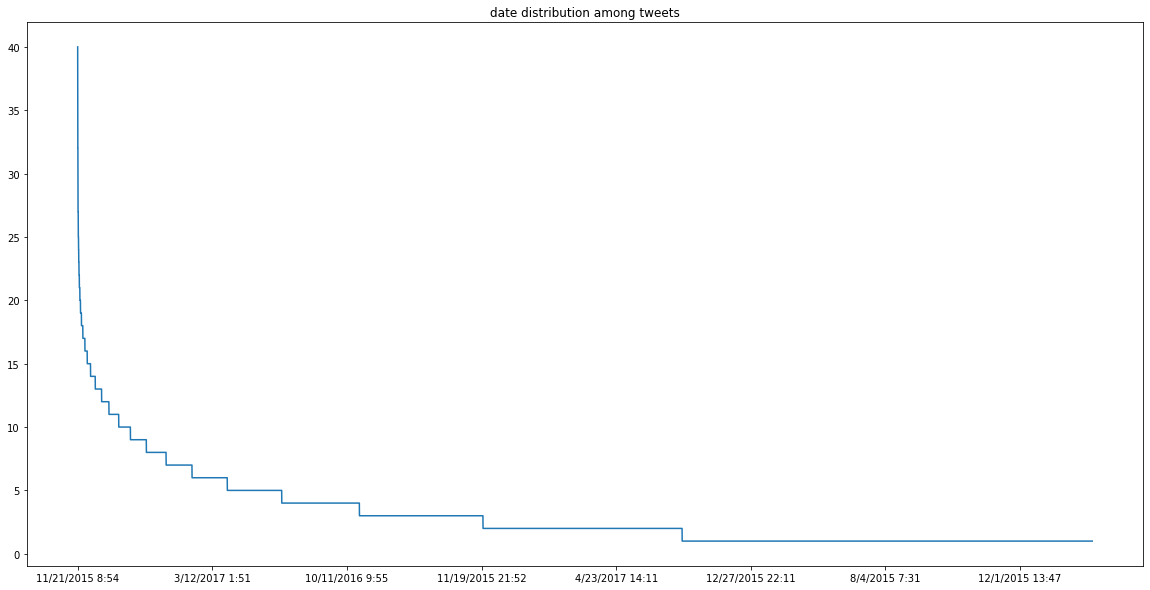

In [39]:
tweets['publish_date'].value_counts().plot(figsize=(20, 10), title= 'date distribution among tweets')

Looking at the tweets made in 2016

In [40]:
tweets_2016 = tweets[tweets['publish_date'].str.contains('2016')]
tweets_2016

,author,content,account_category,post_type,publish_date,following,followers
4218,4EVER1937,"Турецкие танки вошли в Сирию. Представляете, к...",NonEnglish,RETWEET,8/24/2016 12:35,382,4701
4273,4EVER1937,1)Россия внесла в список санкционный продуктов...,NonEnglish,RETWEET,9/13/2016 20:35,380,4560
4274,4EVER1937,"Редкий случай, когда хочется согласиться с пре...",NonEnglish,RETWEET,9/13/2016 20:35,380,4560
4275,4EVER1937,"СЛУЧАЙНО? Бывшего командира ""Альфы"" задавил на...",NonEnglish,RETWEET,9/13/2016 20:37,380,4560
4280,4EVER1937,А 9 млрд рублей в коробках оказались лишь верх...,NonEnglish,RETWEET,9/14/2016 9:35,379,4473
...,...,...,...,...,...,...,...
377949,YLLIA0,"Игра престолов в России, лесорубы и футбол. WH...",NonEnglish,RETWEET,7/14/2016 10:18,148,230
377950,YLLIA0,Член Общественной палаты РФ предложил депутата...,NonEnglish,RETWEET,7/14/2016 16:47,148,230
377952,YLLIA0,Скандал вокруг грязной кампании Гудкова набира...,NonEnglish,RETWEET,8/25/2016 11:11,148,229
377953,YLLIA0,Пятый канал – соучастник преступления или очев...,NonEnglish,RETWEET,8/4/2016 9:06,148,228


### Visualizations

To summarize my research I have made several visualizations showing the various correlations. A t first I look at categorical features of tweets per post type, account type, account category.

C:\Users\xx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\xx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\xx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Temp\ipykernel_20224\1315409488.py:13

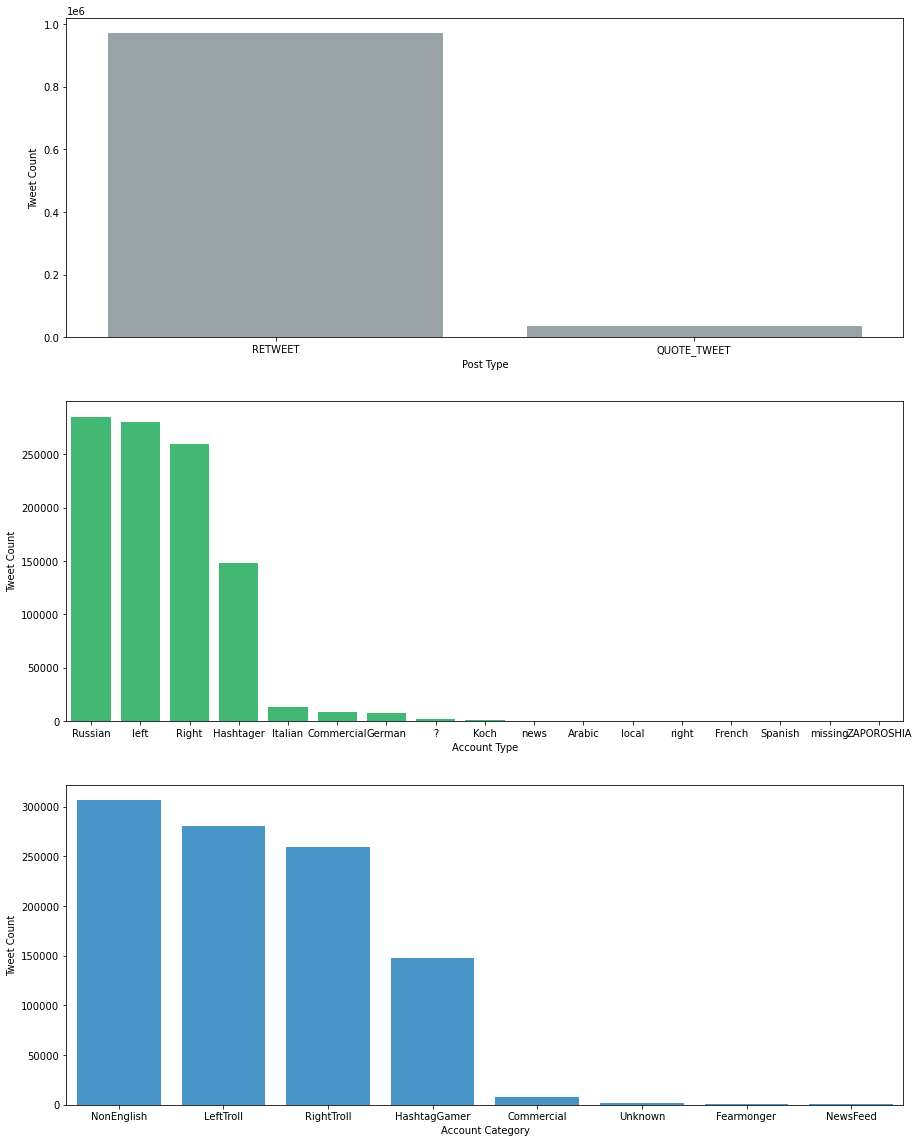

In [41]:
df=tweetmedia
fig, ax =plt.subplots(3,1)
sns.countplot(df['post_type'], ax=ax[0], color='#95a5a6', order=df['post_type'].value_counts().index)
sns.countplot(df['account_type'], ax=ax[1], color='#2ecc71', order=df['account_type'].value_counts().index)
sns.countplot(df['account_category'], ax=ax[2], color='#3498db', order=df['account_category'].value_counts().index)
ax[0].set_xlabel('Post Type')
ax[1].set_xlabel('Account Type')
ax[2].set_xlabel('Account Category')
ax[0].set_ylabel('Tweet Count')
ax[1].set_ylabel('Tweet Count')
ax[2].set_ylabel('Tweet Count')
fig.set_size_inches(15, 20)
fig.show()

The interesting outputs are the predicted domination of Russian, Left, Right account types and NonEnglish, Left troll and Right Troll Account categories.

Then we look at Correlation of Followers and Following by account category, post type for updated_data to see the full picture

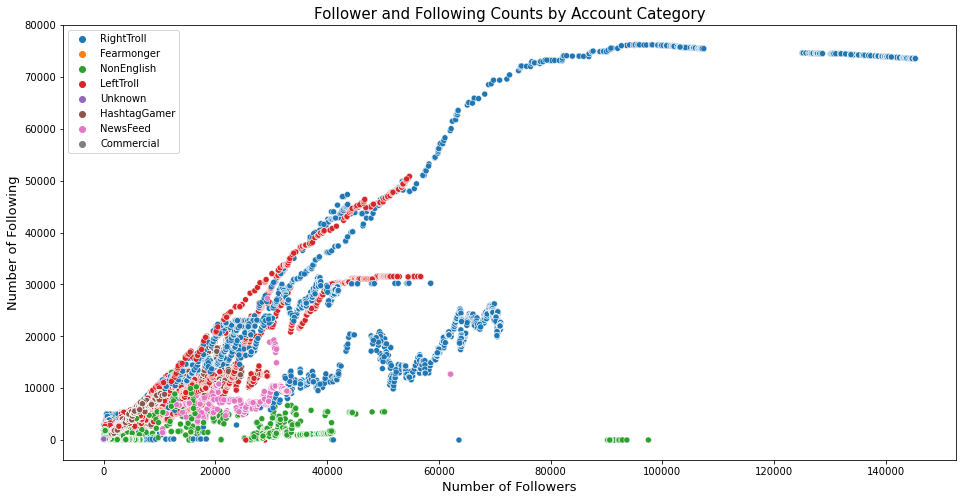

In [42]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="followers", y="following", hue="account_category",data=updated_df)
plt.title('Follower and Following Counts by Account Category', fontsize = 15)
plt.xlabel('Number of Followers', fontsize = 13)
plt.ylabel('Number of Following', fontsize = 13)
plt.legend(loc = 'best')

Text(0, 0.5, 'Number of Following')

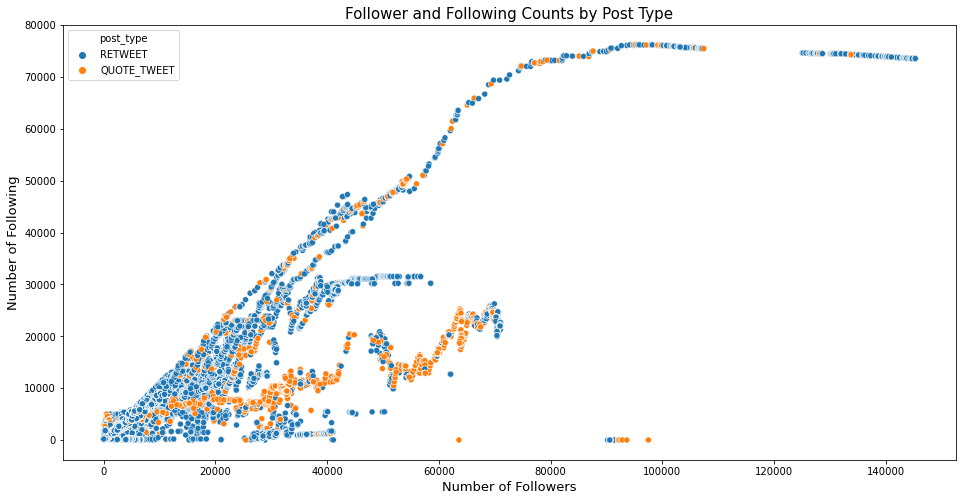

In [43]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="followers", y="following", hue="post_type",data=updated_df)
plt.title('Follower and Following Counts by Post Type', fontsize = 15)
plt.xlabel('Number of Followers', fontsize = 13)
plt.ylabel('Number of Following', fontsize = 13)

As we can see Right Troll (with inclusions of 'Non English' category) has the highest values of followers and following among others. And the number of Retweets are higher starting from 60000 followers/following, while Quote Tweets are more popular among tweets with less following numbers. But let us look at the same graphs for the Russian tweets.

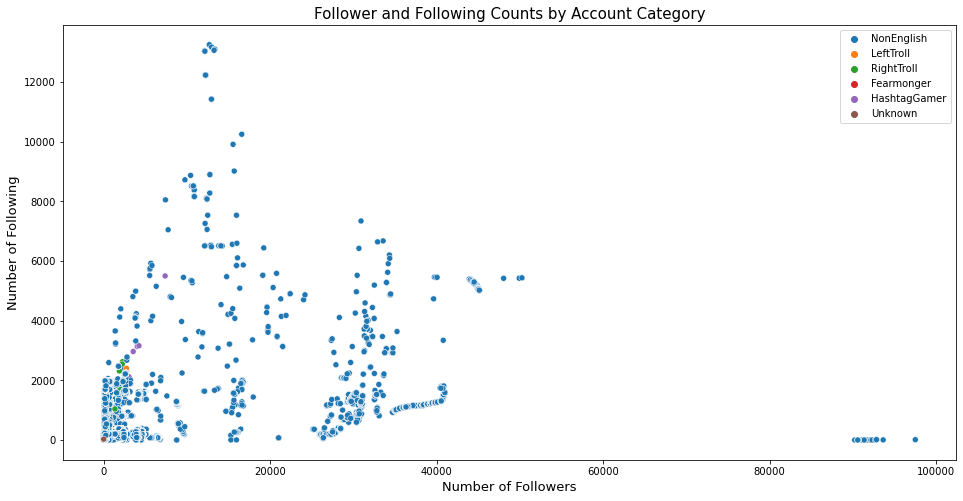

In [44]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="followers", y="following", hue="account_category",data=tweets)
plt.title('Follower and Following Counts by Account Category', fontsize = 15)
plt.xlabel('Number of Followers', fontsize = 13)
plt.ylabel('Number of Following', fontsize = 13)
plt.legend(loc = 'best')

Text(0, 0.5, 'Number of Following')

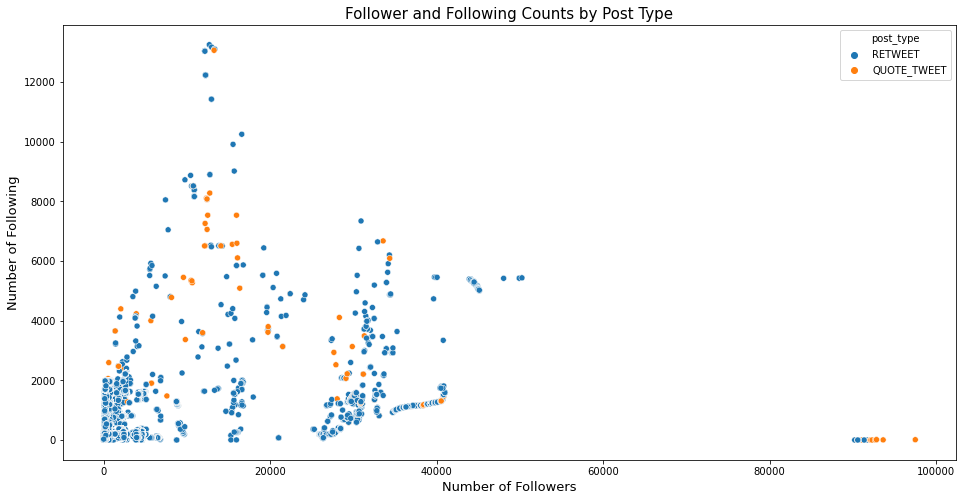

In [45]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="followers", y="following", hue="post_type",data=tweets)
plt.title('Follower and Following Counts by Post Type', fontsize = 15)
plt.xlabel('Number of Followers', fontsize = 13)
plt.ylabel('Number of Following', fontsize = 13)

Here we see a different picture - predictably the NonEnglish category dominates, but the number of followers is lower, which can be explained by the lower volume of the dataset. However, the number of retweets of posts with a high number of 'following'is lower than the number of retweets with less 'following'. As for 'quote tweets' we can see less numbers of both 'followers' and 'following' values. 

Now we look at the frequencies of tweets by date. Again at first we look at the full dataset and then at Russian Tweets

Text(0, 0.5, 'Tweet Count')

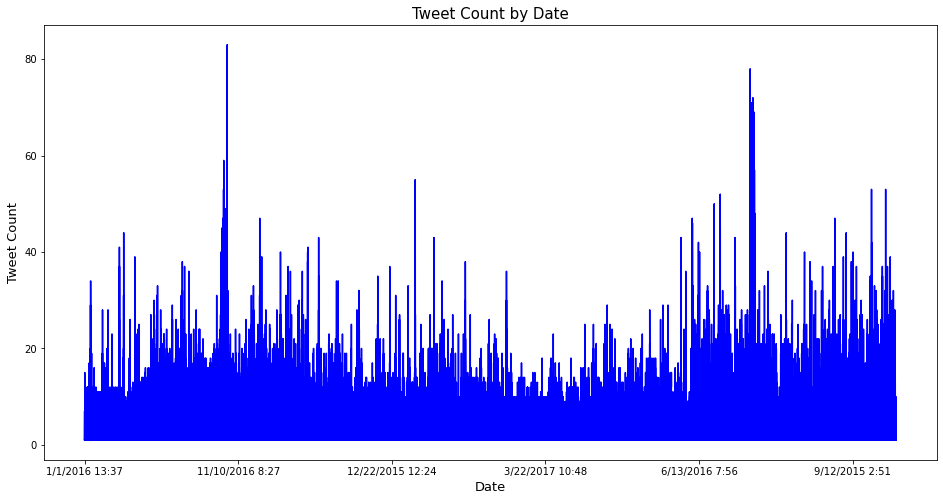

In [46]:
df_date_frequency_full=updated_df
tweet_trend = pd.DataFrame(df_date_frequency_full['publish_date'].value_counts())
tweet_trend.columns = ['tweet_count']
tweet_trend.sort_index(ascending = True, inplace = True)
tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (16,8), color = 'blue')
plt.title('Tweet Count by Date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)

Text(0, 0.5, 'Tweet Count')

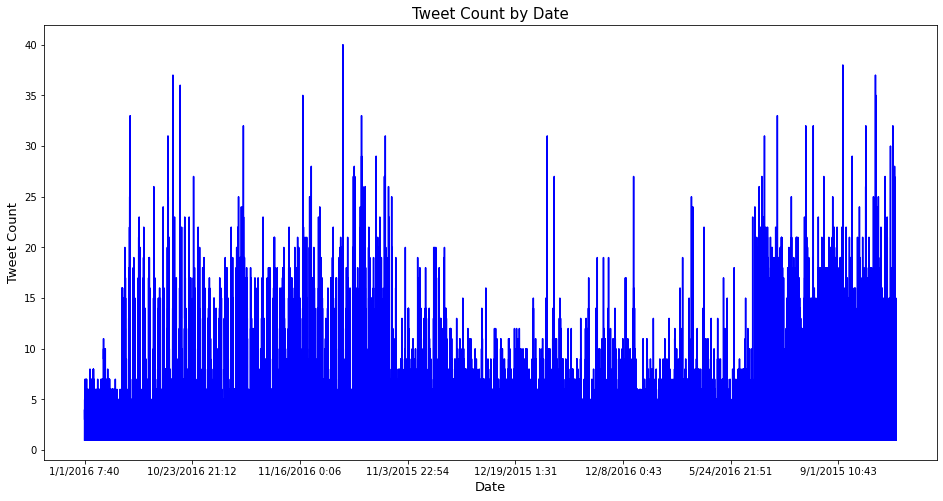

In [47]:
df_date_frequency_rus=tweets
tweet_trend = pd.DataFrame(df_date_frequency_rus['publish_date'].value_counts())
tweet_trend.columns = ['tweet_count']
tweet_trend.sort_index(ascending = True, inplace = True)
tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (16,8), color = 'blue')
plt.title('Tweet Count by Date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)

Here the results show spikes at November 2016 and August 2016 for full dataset and October2016 and September 2015 for Russian tweets. From this I can assume that the high tweets in and around October 2016 are related to Trump's presidential campaign at the time. However, the graph for Russian tweets in September 2015 shows more activity than the graph for the total database in the same period, suggesting that this is due to a surge in Russian-language tweets aimed at the Russian domestic audience.

Now I define the length of Russian tweets

In [48]:
print(len(russian_tweets))
df.head()

241137


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
2,906000000000000000.0,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
4,906000000000000000.0,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll
6,906000000000000000.0,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,10/1/2017 2:48,10/1/2017 2:48,1050,9644,248,RETWEET,Right,0,1,RightTroll
17,906000000000000000.0,10_GOP,BREAKING: The audio of sexual predator Harvey ...,Unknown,English,10/11/2017 0:49,10/11/2017 0:49,1069,10330,305,RETWEET,Right,0,1,RightTroll
20,906000000000000000.0,10_GOP,"Because he hates women so much, President Trum...",Unknown,English,10/11/2017 22:14,10/11/2017 22:14,1070,10358,309,RETWEET,Right,0,1,RightTroll


Now let us go back to our overall database and analyse the content as a whole. I begin with cleaning up the tweets column in our dataframe.

In [49]:
df=updated_df
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"http", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"@", "at")
    df[content_field] = df[content_field].str.lower()
    return df

df = standardize_text(df, "content")

c:\Temp\ipykernel_20224\3287653266.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"http\S+", "")
c:\Temp\ipykernel_20224\3287653266.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"@\S+", "")
c:\Temp\ipykernel_20224\3287653266.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")


Let us review the results

In [50]:
df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
2,906000000000000000.0,10_GOP,daughter of fallen navy sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
4,906000000000000000.0,10_GOP,"19,000 respecting our national anthem! standf...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll
6,906000000000000000.0,10_GOP,,Unknown,English,10/1/2017 2:48,10/1/2017 2:48,1050,9644,248,RETWEET,Right,0,1,RightTroll
17,906000000000000000.0,10_GOP,breaking the audio of sexual predator harvey ...,Unknown,English,10/11/2017 0:49,10/11/2017 0:49,1069,10330,305,RETWEET,Right,0,1,RightTroll
20,906000000000000000.0,10_GOP,"because he hates women so much, president trum...",Unknown,English,10/11/2017 22:14,10/11/2017 22:14,1070,10358,309,RETWEET,Right,0,1,RightTroll


Now I clean, tokenize and remove the stopwords.

In [51]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']
def process_content(new_data):
    tokens = word_tokenize(new_data)
    stopwords_removed = [token for token in tokens if token not in stopwords_list]
    return stopwords_removed   

df['tokens'] = df['content'].apply(process_content)
df['text'] = df['tokens'].apply(' '.join)

Now I check the content

In [52]:
df = df.reset_index()
df.drop(['content'], axis=1, inplace=True)
df.head()

,index,external_author_id,author,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,tokens,text
0,2,906000000000000000.0,10_GOP,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll,"[daughter, fallen, navy, sailor, delivers, pow...",daughter fallen navy sailor delivers powerful ...
1,4,906000000000000000.0,10_GOP,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll,"[19,000, respecting, national, anthem, standfo...","19,000 respecting national anthem standforoura..."
2,6,906000000000000000.0,10_GOP,Unknown,English,10/1/2017 2:48,10/1/2017 2:48,1050,9644,248,RETWEET,Right,0,1,RightTroll,[],
3,17,906000000000000000.0,10_GOP,Unknown,English,10/11/2017 0:49,10/11/2017 0:49,1069,10330,305,RETWEET,Right,0,1,RightTroll,"[breaking, audio, sexual, predator, harvey, we...",breaking audio sexual predator harvey weinstei...
4,20,906000000000000000.0,10_GOP,Unknown,English,10/11/2017 22:14,10/11/2017 22:14,1070,10358,309,RETWEET,Right,0,1,RightTroll,"[hates, women, much, president, trump, nominat...",hates women much president trump nominated ano...


Reviewing number of tokens

In [53]:
word_tot = [word for tokens in df['tokens'] for word in tokens]
word_unique = set(word_tot)
tweet_len = [len(tokens) for tokens in df['tokens']]

print('{} total words with a vocabulary size of {}'.format(len(word_tot), len(word_unique)))
print('Maximum sentence length is {}'.format(max(tweet_len)))

6385061 total words with a vocabulary size of 202983
Maximum sentence length is 62


Now let us visualize tweet lengths. As we can see most of the tweets are up to 5 words.

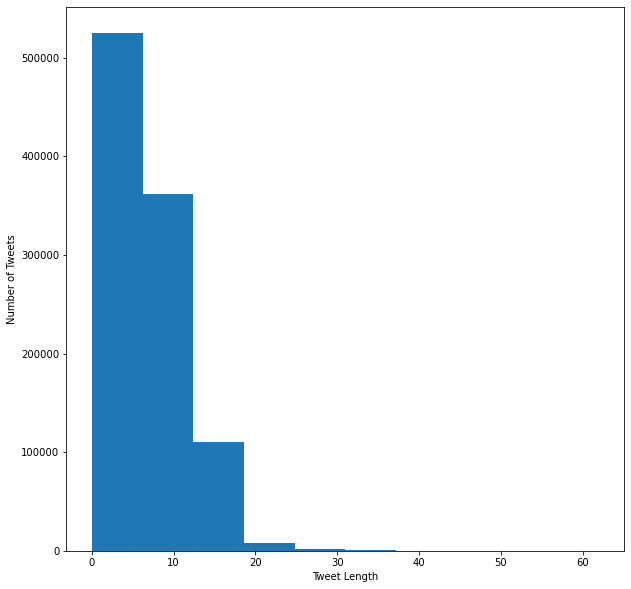

In [54]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.hist(tweet_len)
plt.show()

To conclude I build the wordcloud to look at the most frequent words in the dataset

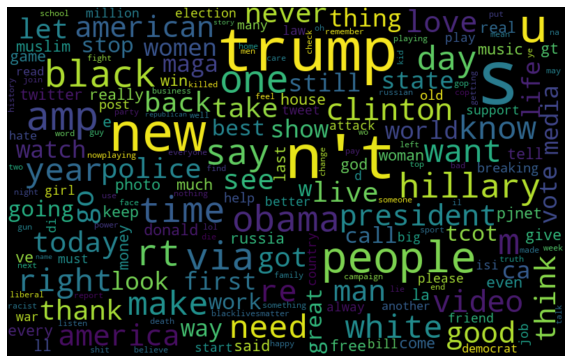

In [55]:
all_words = ' '.join(df['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Predictably the main word is 'Trump' as he is the central character used in Russian propaganda. In addition, there are the words 'n't' and 'new'. Let us look at the representation of word frequency by account category and publish date.

I show wordclouds for Right Troll and Left Troll categories respectively

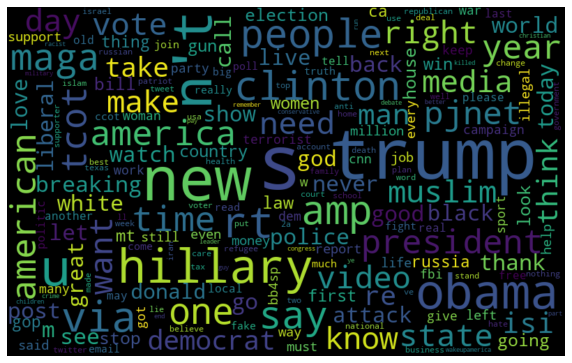

In [58]:
df_right_troll = df.loc[df.account_category == "RightTroll"]
right_words = ' '.join(df_right_troll['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(right_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

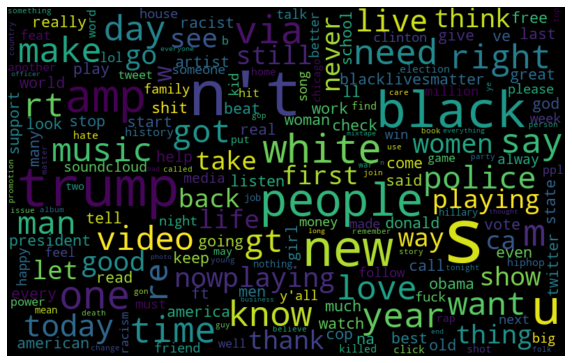

In [59]:
df_left_troll = df.loc[df.account_category == "LeftTroll"]
left_words = ' '.join(df_left_troll['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(left_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

It turns out that the right-wing trolls were more focused on 'Hillary','Obama' and Clinton than the left, whose interests lay more in the realm of racial discourse with such words as 'black', 'white','people','n't'.
Hence, the word 'new' appears on both clouds explaining the interest to the new trends in politics.

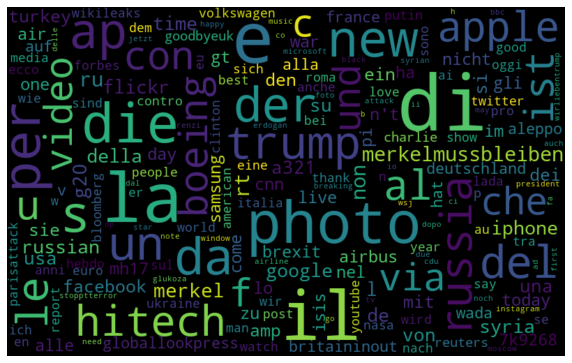

In [62]:
df_non_english = df.loc[df.account_category == "NonEnglish"]
left_words = ' '.join(df_non_english['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(left_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In the most widely represented Non English category, words from different languages can be seen, which is not retrospective for the general trend, but presumably demonstrates the frequency of use of certain languages. Obviously, German words 'die' and 'der' prevail, which, however, can be attributed to stop words, as they are articles, as well as the article di from Italian and the article il from French and Italian.

As this was only a preliminary analysis I can see possibilities for extending it to analyse the content of the texts in more depth. This may require more data and a more organised classification system - nevertheless the analysis showed interesting correlations even in a limited scope.